# **Probabilistic Inference of Regulatory Architectures via PWM Optimization**

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=6ec7cee55ef81d7f1d5f82f3fe11c94d01bfd96ec6b98b56716d32bd5b68690f
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [ ]:
import pandas as pd

After dowloading the CRP dataset from RegulonDB.

I have read the csv file using pandas.

In [ ]:
df=pd.read_csv('CRP.csv')

In [ ]:
df

,activeConformation_name,regulatoryInteraction_function,regulatedEntity_name,regulatedEntity_type,regulatoryInteraction_distanceTo_gene,regulatoryInteraction_distanceTo_promoter,regulatedGenes_name,regulatoryBindingSite_leftPos,regulatoryBindingSite_RightPos,regulatoryBindingSite_strand,Unnamed: 10,confidenceLevel,citations
0,CRP-cyclic-AMP DNA-binding transcriptional dua...,repressor,malIp,promoter,-31.5,17.5,malI,1699201.0,1699222.0,reverse,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,C,NaN
1,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,exuTp2,promoter,-383.5,-161.5,exuT,3244830.0,3244851.0,forward,ccgaagatatTTTCGTGAGTTAGATCAATAAAcgtagttaaa,W,NaN
2,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,ppdDp,promoter,-136.5,20.5,ppdD; hofB; hofC,117675.0,117696.0,reverse,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,S,NaN
3,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,hofMp,promoter,-257.5,-80.5,hofM; hofN; hofO; hofP,3522998.0,3523019.0,reverse,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,S,NaN
4,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,hofMp,promoter,-176.5,1.5,hofM; hofN; hofO; hofP,3522917.0,3522938.0,reverse,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,lsrRp,promoter,-76.5,-60.5,lsrR; lsrK,1601307.0,1601328.0,reverse,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,C,NaN
452,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,sbmCp2,promoter,-82.5,-41.5,sbmC,2081334.0,2081355.0,reverse,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,S,NaN
453,CRP-cyclic-AMP DNA-binding transcriptional dua...,repressor,cytRp,promoter,-117.5,-64.5,cytR,4124563.0,4124584.0,reverse,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,S,NaN
454,CRP-cyclic-AMP DNA-binding transcriptional dua...,activator,murQp1,promoter,-111.5,-71.5,murQ; murP,2545651.0,2545672.0,forward,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,S,NaN


In [ ]:
df.rename(columns={'Unnamed: 10': 'regulatoryBindingSite_sequence'}, inplace=True)

In [ ]:
type(df['confidenceLevel'].loc[0])

str

In [ ]:
type(df['confidenceLevel'].iloc[0])

str

In [ ]:
column_to_keep=['confidenceLevel','regulatoryBindingSite_sequence','regulatoryBindingSite_strand']

In [ ]:
df=df[column_to_keep]
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,W,ccgaagatatTTTCGTGAGTTAGATCAATAAAcgtagttaaa,forward
2,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
3,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
4,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
...,...,...,...
451,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
452,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
453,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
454,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


In [ ]:
df.loc[:,['confidenceLevel','regulatoryBindingSite_sequence']]

,confidenceLevel,regulatoryBindingSite_sequence
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta
1,W,ccgaagatatTTTCGTGAGTTAGATCAATAAAcgtagttaaa
2,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt
3,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt
4,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca
...,...,...
451,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc
452,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca
453,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa
454,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta


In [ ]:
df.loc[0:101,['confidenceLevel']]

,confidenceLevel
0,C
1,W
2,S
3,S
4,S
...,...
97,C
98,C
99,C
100,W


In [ ]:
df.iloc[0:101,0:2]

,confidenceLevel,regulatoryBindingSite_sequence
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta
1,W,ccgaagatatTTTCGTGAGTTAGATCAATAAAcgtagttaaa
2,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt
3,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt
4,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca
...,...,...
96,C,tttaataaagAATTTTGCGCTAAAGCACATTTctgtaccaat
97,C,tgtaattctgCGATGTGATATTGCTCTCCTATggagaattaa
98,C,ggatggaaaaTTCTTAGAAACCGATCACATACagctgcattt
99,C,ggatggaaaaTTCTTAGAAACCGATCACATACagctgcattt


In [ ]:
df.iloc[:,0]

,confidenceLevel
0,C
1,W
2,S
3,S
4,S
...,...
451,C
452,S
453,S
454,S


In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,W,ccgaagatatTTTCGTGAGTTAGATCAATAAAcgtagttaaa,forward
2,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
3,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
4,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
...,...,...,...
451,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
452,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
453,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
454,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


Keeping only the rows with ConfidenceLevel Confirmed (C) and Strong (S)

In [ ]:
df=df[df['confidenceLevel'].apply(lambda x : x in ['S','C'])]

In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
2,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
3,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
4,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
5,S,ggaaaaatatTCAGGTGACCGGTTTCACAAATataaaaaatg,forward
...,...,...,...
451,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
452,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
453,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
454,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,2,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
2,3,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
3,4,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
4,5,S,ggaaaaatatTCAGGTGACCGGTTTCACAAATataaaaaatg,forward
...,...,...,...,...
265,451,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
266,452,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
267,453,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
268,454,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


In [ ]:
import numpy as np

a=np.array([[1,2,3],[3,4,5]])

np.sum(a,axis=0)

array([4, 6, 8])

In [ ]:
df.drop(columns=['index'],axis=1,inplace=True)

/tmp/ipython-input-932265166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'],axis=1,inplace=True)


In [ ]:
s="ABC"
s=s[::-1]
print(s)

CBA


In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
2,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
3,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
4,S,ggaaaaatatTCAGGTGACCGGTTTCACAAATataaaaaatg,forward
...,...,...,...
265,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
266,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
267,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
268,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


Writing a fucntion to create the reverse complement of a sequence.

In [ ]:
def reverse_complement(s):
  s=s[::-1]
  s_final=""
  l=[]
  for i in s:
    if i=="A" :
      l.append("T")
    elif i=="T":
      l.append("A")
    elif i=="G":
      l.append("C")
    elif i=="C":
      l.append("G")

  for i in l:
    s_final=s_final+i

  return s_final




In [ ]:
print(reverse_complement("ATGC"))

GCAT


In [ ]:
df=df[:]

In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
2,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
3,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
4,S,ggaaaaatatTCAGGTGACCGGTTTCACAAATataaaaaatg,forward
...,...,...,...
265,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
266,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
267,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
268,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


In [ ]:
df.isna().sum(axis=0)

,0
confidenceLevel,0
regulatoryBindingSite_sequence,1
regulatoryBindingSite_strand,10


Here I have dropped few rows which have NaN values in both the columns: **regulatoryBindingSite_strand **and** regulatoryBindingSite_sequence**

In [ ]:
df.dropna(subset=['regulatoryBindingSite_strand'],inplace=True)

/tmp/ipython-input-3559577369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['regulatoryBindingSite_strand'],inplace=True)


In [ ]:
df.dropna(subset=['regulatoryBindingSite_sequence'],inplace=True)

/tmp/ipython-input-729470125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['regulatoryBindingSite_sequence'],inplace=True)


In [ ]:
df.isna().sum(axis=0)

,0
confidenceLevel,0
regulatoryBindingSite_sequence,0
regulatoryBindingSite_strand,0


In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
2,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
3,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
4,S,ggaaaaatatTCAGGTGACCGGTTTCACAAATataaaaaatg,forward
...,...,...,...
265,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
266,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
267,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
268,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


Checking if all the values in the column **regulatoryBindingSite_sequence** is having data type of string or not.

In [ ]:
for i in range(len(df)):    # One is in float type
  print(type(df['regulatoryBindingSite_sequence'].iloc[i]))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [ ]:
for i in range(len(df)):    #One is in float type
  if type(df['regulatoryBindingSite_sequence'].iloc[i]) is float:
    print(i)

In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,ataaaaggtaAAACGTTTTATCTGTCACATAAtcagggagta,reverse
1,S,ttccccaactTTCTTCGTAACGCCTCGCAAATttcttgtctt,reverse
2,S,ggcgctgtaaATCTGCATCGGAATTTGCAGGCgaacatcttt,reverse
3,S,gtataggccaTAAATCGAGCCTGCTCCCAGCAgaatgcaaca,reverse
4,S,ggaaaaatatTCAGGTGACCGGTTTCACAAATataaaaaatg,forward
...,...,...,...
265,C,cgtagagtcaAACTGTGGTTGCCATCACAGATataaatgagc,reverse
266,S,agactggcagGAGTGCGAGTCTGCTCGCATAAtcaacactca,reverse
267,S,gcggatcgaaAAATTCAATATTCATCACACTTttcatgaaaa,reverse
268,S,ccgcttaagtTCTTATGACGCTCTTCACACTCtgcgagtgta,forward


In [ ]:
for i in range(len(df)):    #One is in float type
  if type(df['regulatoryBindingSite_sequence'].iloc[i]) is float:
    print(i)

We have 259 motif sequcnes after cleaning and preprocessing of data

In [ ]:
len(df)

259

In [ ]:
for i in range(len(df)):

  s=""

  for j in df['regulatoryBindingSite_sequence'].iloc[i]:
    if j.isupper()==True:
      s=s+j

  df['regulatoryBindingSite_sequence'].iloc[i]=s


/tmp/ipython-input-2115602143.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['regulatoryBindingSite_sequence'].iloc[i]=s
/tmp/ipython-input-2115602143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,AAACGTTTTATCTGTCACATAA,reverse
1,S,TTCTTCGTAACGCCTCGCAAAT,reverse
2,S,ATCTGCATCGGAATTTGCAGGC,reverse
3,S,TAAATCGAGCCTGCTCCCAGCA,reverse
4,S,TCAGGTGACCGGTTTCACAAAT,forward
...,...,...,...
265,C,AACTGTGGTTGCCATCACAGAT,reverse
266,S,GAGTGCGAGTCTGCTCGCATAA,reverse
267,S,AAATTCAATATTCATCACACTT,reverse
268,S,TCTTATGACGCTCTTCACACTC,forward


In [ ]:
df=df[df['regulatoryBindingSite_sequence'].apply(lambda x: len(x)==22)]

In [ ]:
df

,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,C,AAACGTTTTATCTGTCACATAA,reverse
1,S,TTCTTCGTAACGCCTCGCAAAT,reverse
2,S,ATCTGCATCGGAATTTGCAGGC,reverse
3,S,TAAATCGAGCCTGCTCCCAGCA,reverse
4,S,TCAGGTGACCGGTTTCACAAAT,forward
...,...,...,...
265,C,AACTGTGGTTGCCATCACAGAT,reverse
266,S,GAGTGCGAGTCTGCTCGCATAA,reverse
267,S,AAATTCAATATTCATCACACTT,reverse
268,S,TCTTATGACGCTCTTCACACTC,forward


In [ ]:
df.to_csv("Full_Final_list.csv")

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Full_Final_list.csv')

In [ ]:
c=0
for i in range(len(df)):
  print(len(df['regulatoryBindingSite_sequence'].iloc[i]))
  c=c+1
print(c)

22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
236


In [ ]:
for i in range(len(df)):

  if df['regulatoryBindingSite_strand'].iloc[i]=="reverse":
    df['regulatoryBindingSite_sequence'].iloc[i]=reverse_complement(df["regulatoryBindingSite_sequence"].iloc[i])



/tmp/ipython-input-3506049356.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['regulatoryBindingSite_sequence'].iloc[i]=reverse_complement(df["regulatoryBindingSite_sequence"].iloc[i])
/tmp/ipython-input-3506049356.py:4: SettingWithCo

In [ ]:
df

,Unnamed: 0,confidenceLevel,regulatoryBindingSite_sequence,regulatoryBindingSite_strand
0,0,C,TTATGTGACAGATAAAACGTTT,reverse
1,1,S,ATTTGCGAGGCGTTACGAAGAA,reverse
2,2,S,GCCTGCAAATTCCGATGCAGAT,reverse
3,3,S,TGCTGGGAGCAGGCTCGATTTA,reverse
4,4,S,TCAGGTGACCGGTTTCACAAAT,forward
...,...,...,...,...
231,265,C,ATCTGTGATGGCAACCACAGTT,reverse
232,266,S,TTATGCGAGCAGACTCGCACTC,reverse
233,267,S,AAGTGTGATGAATATTGAATTT,reverse
234,268,S,TCTTATGACGCTCTTCACACTC,forward


In [ ]:
len(df)

236

In [ ]:
df.drop(['regulatoryBindingSite_strand'],axis=1,inplace=True )

In [ ]:
df

,Unnamed: 0,confidenceLevel,regulatoryBindingSite_sequence
0,0,C,TTATGTGACAGATAAAACGTTT
1,1,S,ATTTGCGAGGCGTTACGAAGAA
2,2,S,GCCTGCAAATTCCGATGCAGAT
3,3,S,TGCTGGGAGCAGGCTCGATTTA
4,4,S,TCAGGTGACCGGTTTCACAAAT
...,...,...,...
231,265,C,ATCTGTGATGGCAACCACAGTT
232,266,S,TTATGCGAGCAGACTCGCACTC
233,267,S,AAGTGTGATGAATATTGAATTT
234,268,S,TCTTATGACGCTCTTCACACTC


In [ ]:
df=df['regulatoryBindingSite_sequence']

In [ ]:
df

,regulatoryBindingSite_sequence
0,TTATGTGACAGATAAAACGTTT
1,ATTTGCGAGGCGTTACGAAGAA
2,GCCTGCAAATTCCGATGCAGAT
3,TGCTGGGAGCAGGCTCGATTTA
4,TCAGGTGACCGGTTTCACAAAT
...,...
231,ATCTGTGATGGCAACCACAGTT
232,TTATGCGAGCAGACTCGCACTC
233,AAGTGTGATGAATATTGAATTT
234,TCTTATGACGCTCTTCACACTC


In [ ]:
import numpy as np

In [ ]:
a=np.array([1,2,3])
b=np.array([3,4,5])

c=np.stack((a,b),axis=1)

c

array([[1, 3],
       [2, 4],
       [3, 5]])

In [ ]:
df.iloc[0]

'TTATGTGACAGATAAAACGTTT'

In [ ]:
len(df.iloc[0])

22

In [ ]:
type(df.iloc[0])

str

Creating the PWM.

I have used pseudocounts to counter zero counts.

In [ ]:
# Positional Frequency Matrix formation

PFM=np.zeros((4,22))

for i in range(22):
  alpha=0.1
  c_A=0
  c_T=0
  c_G=0
  c_C=0
  for j in range(len(df)):
    curr=df.iloc[j]
    if curr[i]=="A":
      c_A+=1
    elif curr[i]=="T":
      c_T+=1
    elif curr[i]=="G":
      c_G+=1
    elif curr[i]=="C":
      c_C+=1

  c_A+=alpha
  c_T+=alpha
  c_G+=alpha
  c_C+=alpha

  l=[c_A,c_T,c_G,c_C]
  for k in range(4):
    PFM[k,i]=l[k]

print(PFM)



[[105.1 110.1  90.1  28.1  18.1  19.1   8.1 182.1  48.1  59.1  52.1  96.1
   60.1 104.1  17.1  25.1 168.1  37.1 165.1  70.1  86.1  83.1]
 [ 96.1  88.1  79.1 159.1  41.1 167.1  27.1  11.1  91.1  58.1  73.1  44.1
   45.1  57.1 162.1  27.1  27.1  17.1  21.1  96.1 116.1 114.1]
 [ 27.1  30.1  36.1  18.1 164.1  18.1 193.1  22.1  41.1  51.1  40.1  59.1
   83.1  27.1  27.1  11.1  30.1  11.1  30.1  35.1  19.1  13.1]
 [  8.1   8.1  31.1  31.1  13.1  32.1   8.1  21.1  56.1  68.1  71.1  37.1
   48.1  48.1  30.1 173.1  11.1 171.1  20.1  35.1  15.1  26.1]]


In [ ]:
np.sum(PFM,axis=0)[0]

np.float64(236.39999999999998)

In [ ]:
PFM.shape

(4, 22)

Finding PPM

In [ ]:
# Formation of PPM (Positional Probability Matrix)

PPM=PFM/(np.sum(PFM,axis=0)[0])    # Adding pseudocounts

In [ ]:
PPM

array([[0.44458545, 0.46573604, 0.38113367, 0.11886633, 0.07656514,
        0.08079526, 0.03426396, 0.77030457, 0.2034687 , 0.25      ,
        0.22038917, 0.40651438, 0.25423012, 0.44035533, 0.07233503,
        0.10617597, 0.71108291, 0.15693739, 0.69839255, 0.2965313 ,
        0.3642132 , 0.35152284],
       [0.40651438, 0.37267343, 0.33460237, 0.67301184, 0.17385787,
        0.70685279, 0.11463621, 0.04695431, 0.38536379, 0.24576988,
        0.30922166, 0.18654822, 0.19077834, 0.24153976, 0.6857022 ,
        0.11463621, 0.11463621, 0.07233503, 0.0892555 , 0.40651438,
        0.49111675, 0.48265651],
       [0.11463621, 0.12732657, 0.15270728, 0.07656514, 0.69416244,
        0.07656514, 0.81683587, 0.09348562, 0.17385787, 0.21615905,
        0.16962775, 0.25      , 0.35152284, 0.11463621, 0.11463621,
        0.04695431, 0.12732657, 0.04695431, 0.12732657, 0.14847716,
        0.08079526, 0.05541455],
       [0.03426396, 0.03426396, 0.13155668, 0.13155668, 0.05541455,
        0.1357868

In [ ]:
np.sum(PPM,axis=0) # working fine correct

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [ ]:
np.sum(PPM,axis=1)

array([6.90439932, 6.84517766, 4.17597293, 4.07445008])

In [ ]:
PPM[0:2,0:2]

array([[0.44458545, 0.46573604],
       [0.40651438, 0.37267343]])

In [ ]:
np.random.randint(0,4,size=(22,))

array([0, 3, 2, 0, 3, 1, 1, 3, 1, 3, 2, 2, 0, 3, 2, 3, 1, 0, 3, 2, 2, 1])

Method to create random sequences following null hypothesis

In [ ]:
def random_background_seq(n):

  created_seq=[]

  for i in range(n):
    x=np.random.randint(0,4,size=(22,))
    seq=["a"]*22
    for j in range(len(x)):
      if x[j]==0:
        seq[j]="A"
      elif x[j]==1:
        seq[j]="T"
      elif x[j]==2:
        seq[j]="G"
      elif x[j]==3:
        seq[j]="C"

    created_seq.append(seq)

  return created_seq

random_background_seq(3)



[['G',
  'G',
  'G',
  'A',
  'A',
  'T',
  'A',
  'T',
  'A',
  'C',
  'G',
  'C',
  'G',
  'A',
  'C',
  'A',
  'C',
  'T',
  'G',
  'A',
  'T',
  'G'],
 ['G',
  'T',
  'A',
  'T',
  'T',
  'G',
  'T',
  'C',
  'A',
  'G',
  'G',
  'G',
  'A',
  'C',
  'G',
  'T',
  'G',
  'A',
  'C',
  'C',
  'G',
  'C'],
 ['A',
  'T',
  'G',
  'T',
  'C',
  'A',
  'A',
  'A',
  'T',
  'C',
  'T',
  'A',
  'C',
  'G',
  'C',
  'A',
  'G',
  'C',
  'T',
  'G',
  'T',
  'T']]

In [ ]:
# Empirical Distirbtuion of Log-Likelihood Ratio

sampeled_seq=random_background_seq(10000)

log_like_ratio_score=[]

for i in sampeled_seq:
  log_likelihood=0
  for j in range(len(i)):
    if i[j]=="A":
      log_likelihood=log_likelihood+np.log(PPM[0,j]/0.25)
    elif i[j]=="T":
      log_likelihood=log_likelihood+np.log(PPM[1,j]/0.25)
    elif i[j]=="G":
      log_likelihood=log_likelihood+np.log(PPM[2,j]/0.25)
    elif i[j]=="C":
      log_likelihood=log_likelihood+np.log(PPM[3,j]/0.25)

  log_like_ratio_score.append(log_likelihood)




In [ ]:
log_like_ratio_score   # Empirirical Distirbtuion

[np.float64(-7.6289972945492766),
 np.float64(-1.1225445882637202),
 np.float64(-11.487977951182765),
 np.float64(-8.334496453019636),
 np.float64(-8.088266619261278),
 np.float64(-3.1787466270248483),
 np.float64(-2.9878652047124756),
 np.float64(-2.3411195376574017),
 np.float64(-0.11474153824130962),
 np.float64(-6.48366553768799),
 np.float64(-10.42382322155936),
 np.float64(-1.5931811334263104),
 np.float64(-9.02369271860881),
 np.float64(-9.005050827833882),
 np.float64(-3.401321537222211),
 np.float64(-9.942188412646942),
 np.float64(-10.135271525011357),
 np.float64(-9.173834739340402),
 np.float64(-12.381647889028072),
 np.float64(-4.833313379976994),
 np.float64(-1.4853218026022739),
 np.float64(-11.217575010968103),
 np.float64(-11.683022121304075),
 np.float64(-6.238687798029526),
 np.float64(-5.4364047040838175),
 np.float64(-8.177253892797642),
 np.float64(-5.589905633001281),
 np.float64(-9.352806226312163),
 np.float64(-6.560038740843957),
 np.float64(-7.243069340269153

Text(0, 0.5, 'frequency')

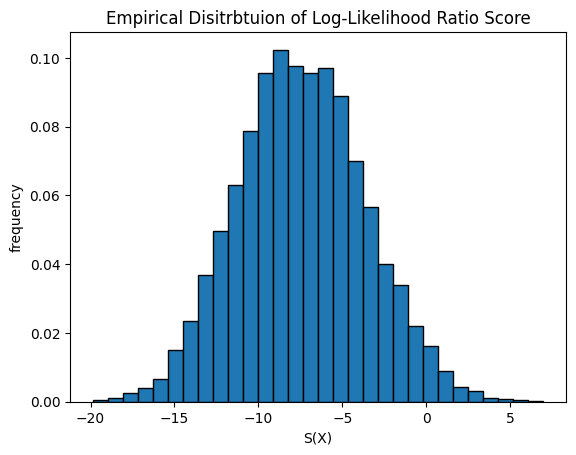

In [ ]:
import matplotlib.pyplot as plt

plt.hist(log_like_ratio_score,edgecolor='black',density=True,bins=30)
plt.title('Empirical Disitrbtuion of Log-Likelihood Ratio Score')
plt.xlabel('S(X)')
plt.ylabel('frequency')


In [ ]:
per=np.percentile(log_like_ratio_score,97)

per

np.float64(-0.13617715287345053)

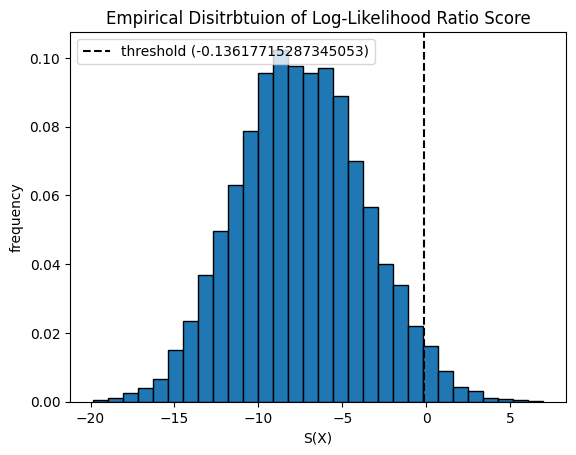

In [ ]:

plt.hist(log_like_ratio_score,edgecolor='black',density=True,bins=30)
plt.title('Empirical Disitrbtuion of Log-Likelihood Ratio Score')
plt.xlabel('S(X)')
plt.ylabel('frequency')
plt.axvline(x=per,color='black',linestyle='--',label=f'threshold ({per})')

plt.legend()


In [ ]:
PPM[1,2]

np.float64(0.33460236886632827)

In [ ]:
PPM

array([[0.44458545, 0.46573604, 0.38113367, 0.11886633, 0.07656514,
        0.08079526, 0.03426396, 0.77030457, 0.2034687 , 0.25      ,
        0.22038917, 0.40651438, 0.25423012, 0.44035533, 0.07233503,
        0.10617597, 0.71108291, 0.15693739, 0.69839255, 0.2965313 ,
        0.3642132 , 0.35152284],
       [0.40651438, 0.37267343, 0.33460237, 0.67301184, 0.17385787,
        0.70685279, 0.11463621, 0.04695431, 0.38536379, 0.24576988,
        0.30922166, 0.18654822, 0.19077834, 0.24153976, 0.6857022 ,
        0.11463621, 0.11463621, 0.07233503, 0.0892555 , 0.40651438,
        0.49111675, 0.48265651],
       [0.11463621, 0.12732657, 0.15270728, 0.07656514, 0.69416244,
        0.07656514, 0.81683587, 0.09348562, 0.17385787, 0.21615905,
        0.16962775, 0.25      , 0.35152284, 0.11463621, 0.11463621,
        0.04695431, 0.12732657, 0.04695431, 0.12732657, 0.14847716,
        0.08079526, 0.05541455],
       [0.03426396, 0.03426396, 0.13155668, 0.13155668, 0.05541455,
        0.1357868

In [ ]:
import numpy as np

In [ ]:
PPM.shape

(4, 22)

In [ ]:
seq='AAATTTGAAGCAGTTAACGCTA'   # Random-Sequence

log_likelihood=0

for i in range(len(seq)):
  if seq[i]=="A":
    log_likelihood=log_likelihood+np.log(PPM[0,i]/0.25)
  elif seq[i]=="T":
    log_likelihood=log_likelihood+np.log(PPM[1,i]/0.25)
  elif seq[i]=="G":
    log_likelihood=log_likelihood+np.log(PPM[2,i]/0.25)
  elif seq[i]=="C":
    log_likelihood+log_likelihood+np.log(PPM[3,i]/0.25)


print(log_likelihood)



7.57569847744715


In [ ]:
import matplotlib.pyplot as plt

The sequnce in rejection region thus we can say that this is not a background seqnece for a significance level of 0.05


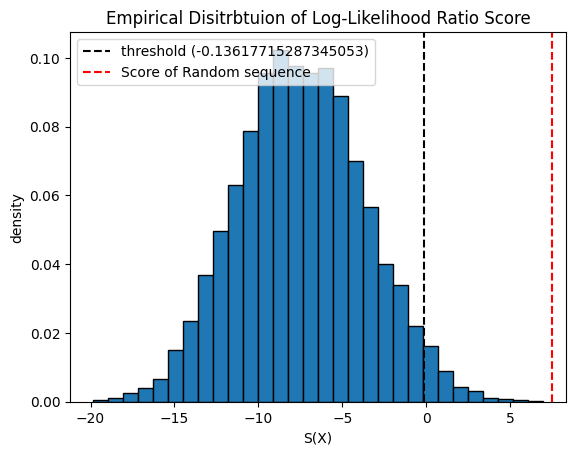

In [ ]:

plt.hist(log_like_ratio_score,edgecolor='black',density=True,bins=30)
plt.title('Empirical Disitrbtuion of Log-Likelihood Ratio Score')
plt.xlabel('S(X)')
plt.ylabel('density')
plt.axvline(x=per,color='black',linestyle='--',label=f'threshold ({per})')
plt.axvline(x=7.4751,color='red',linestyle="--",label="Score of Random sequence")

plt.legend()
print("The sequnce in rejection region thus we can say that this is not a background seqnece for a significance level of 0.05")

In [ ]:
seq=random_background_seq(10)

seq_str=""

for i in seq:
  for j in i:
    seq_str+=j



In [ ]:
seq_str

'ATCCGTTCATCACGGTGCTAGCGCTCATGAGAGGCGTTACGTGCGGGTAAAGGGCCGGTTAACCCTGAGTCGCGCAGGGTAGACAACCAAAAATGTCGTAGTATCCTCGACGGTGATTTATTTTCACGTTCCTCACAGACCGACACCTGGCGGCTTCGTACCTCTTAAACTGCGGATTCGAAGTGCTTTGCTTAACATTTTGGTGCTAACAGCCTATGGA'

In [ ]:
seq=seq_str

In [ ]:
seq

'ATCCGTTCATCACGGTGCTAGCGCTCATGAGAGGCGTTACGTGCGGGTAAAGGGCCGGTTAACCCTGAGTCGCGCAGGGTAGACAACCAAAAATGTCGTAGTATCCTCGACGGTGATTTATTTTCACGTTCCTCACAGACCGACACCTGGCGGCTTCGTACCTCTTAAACTGCGGATTCGAAGTGCTTTGCTTAACATTTTGGTGCTAACAGCCTATGGA'

In [ ]:
# seq="ATGCGTACCTGATCGTACGATGCTAGCTACGTTAGCAGTCTAGGCTACGATCGTACGTAGCTAGTACGATCGATGCTAGCTAGTC"

i=0
j=21

l={}

while j<=len(seq)-1:

  log_likelihood=0
  index=0

  for k in range(i,j+1):
    if seq[k]=="A":
      log_likelihood+=np.log(PPM[0,index]/0.25)
    elif seq[k]=="T":
      log_likelihood+=np.log(PPM[1,index]/0.25)
    elif seq[k]=="G":
      log_likelihood+=np.log(PPM[2,index]/0.25)
    elif seq[k]=="C":
      log_likelihood+=np.log(PPM[3,index]/0.25)

    index+=1

  l[i]=log_likelihood

  j+=1
  i+=1



In [ ]:
l   # All the scores for all the windows

{0: np.float64(-4.573003994724188),
 1: np.float64(-9.909149666584197),
 2: np.float64(-11.764415435530886),
 3: np.float64(-11.715801341902067),
 4: np.float64(-3.277177521725242),
 5: np.float64(-12.90053926998296),
 6: np.float64(-6.467994930598814),
 7: np.float64(-10.891319201252474),
 8: np.float64(-1.6736519654528914),
 9: np.float64(-11.101469658111787),
 10: np.float64(-0.6657475014539402),
 11: np.float64(-13.308152757671083),
 12: np.float64(-9.259797634076651),
 13: np.float64(-8.460609890063868),
 14: np.float64(-10.189574084365926),
 15: np.float64(-10.832947829786214),
 16: np.float64(-5.841110466918226),
 17: np.float64(-10.998400700771478),
 18: np.float64(-7.424576192434759),
 19: np.float64(-9.205707037794465),
 20: np.float64(-13.571326870606267),
 21: np.float64(-12.291545803249926),
 22: np.float64(-2.486738578812649),
 23: np.float64(-16.00374318367524),
 24: np.float64(-4.429069678591564),
 25: np.float64(-17.23571057124094),
 26: np.float64(-3.4748517732835005)

In [ ]:
for i in l:
  if l[i]>per:
    print(i)

102
108
118
173
178
195


In [ ]:
seq

'ATCCGTTCATCACGGTGCTAGCGCTCATGAGAGGCGTTACGTGCGGGTAAAGGGCCGGTTAACCCTGAGTCGCGCAGGGTAGACAACCAAAAATGTCGTAGTATCCTCGACGGTGATTTATTTTCACGTTCCTCACAGACCGACACCTGGCGGCTTCGTACCTCTTAAACTGCGGATTCGAAGTGCTTTGCTTAACATTTTGGTGCTAACAGCCTATGGA'

In [ ]:
# Candidate Motif Sequences we got

for i in l:
  if l[i]>per:
    print(seq[i:i+22])

ATCCTCGACGGTGATTTATTTT
GACGGTGATTTATTTTCACGTT
TATTTTCACGTTCCTCACAGAC
GGATTCGAAGTGCTTTGCTTAA
CGAAGTGCTTTGCTTAACATTT
CATTTTGGTGCTAACAGCCTAT


In [ ]:
l[0]

np.float64(-4.573003994724188)

In [ ]:
seq=random_background_seq(10)    # A random sequcne generated from the background model
seq

[['T',
  'G',
  'A',
  'C',
  'T',
  'A',
  'A',
  'T',
  'T',
  'G',
  'C',
  'A',
  'A',
  'T',
  'C',
  'C',
  'T',
  'T',
  'G',
  'G',
  'G',
  'G'],
 ['G',
  'C',
  'C',
  'C',
  'T',
  'G',
  'T',
  'C',
  'C',
  'A',
  'T',
  'C',
  'T',
  'G',
  'G',
  'C',
  'A',
  'G',
  'C',
  'T',
  'C',
  'G'],
 ['A',
  'A',
  'A',
  'T',
  'C',
  'C',
  'C',
  'G',
  'G',
  'A',
  'A',
  'C',
  'A',
  'T',
  'A',
  'A',
  'T',
  'C',
  'T',
  'C',
  'G',
  'C'],
 ['G',
  'G',
  'T',
  'C',
  'A',
  'C',
  'T',
  'G',
  'T',
  'C',
  'G',
  'C',
  'G',
  'T',
  'G',
  'A',
  'C',
  'G',
  'G',
  'G',
  'G',
  'A'],
 ['C',
  'C',
  'T',
  'T',
  'C',
  'C',
  'A',
  'A',
  'A',
  'A',
  'C',
  'C',
  'C',
  'A',
  'C',
  'T',
  'G',
  'T',
  'A',
  'T',
  'G',
  'C'],
 ['A',
  'A',
  'C',
  'C',
  'G',
  'T',
  'C',
  'C',
  'G',
  'T',
  'G',
  'T',
  'G',
  'G',
  'C',
  'C',
  'T',
  'A',
  'T',
  'A',
  'C',
  'C'],
 ['T',
  'G',
  'C',
  'G',
  'C',
  'C',
  'G',
  'T',
  'C',
  'A',


In [ ]:
seq[0]

['A',
 'G',
 'C',
 'T',
 'A',
 'C',
 'A',
 'T',
 'A',
 'G',
 'C',
 'C',
 'A',
 'A',
 'G',
 'A',
 'T',
 'T',
 'A',
 'G',
 'G',
 'T']

In [ ]:
seq

[['A',
  'G',
  'C',
  'T',
  'A',
  'C',
  'A',
  'T',
  'A',
  'G',
  'C',
  'C',
  'A',
  'A',
  'G',
  'A',
  'T',
  'T',
  'A',
  'G',
  'G',
  'T']]

In [ ]:
seq_str=""

for i in seq[0]:
  seq_str+=i

In [ ]:
seq_str

'AGCTACATAGCCAAGATTAGGT'

In [ ]:
log_likelihood=0

for i in range(len(seq_str)):
  if seq_str[i]=="A":
    log_likelihood=log_likelihood+np.log(PPM[0,i]/0.25)
  elif seq_str[i]=="T":
    log_likelihood=log_likelihood+np.log(PPM[1,i]/0.25)
  elif seq_str[i]=="G":
    log_likelihood=log_likelihood+np.log(PPM[2,i]/0.25)
  elif seq_str[i]=="C":
    log_likelihood+log_likelihood+np.log(PPM[3,i]/0.25)


print(log_likelihood)

-8.875008503331982


In [ ]:
!pip install logomaker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 63.2 MB/s eta 0:00:00


In [ ]:
PPM.shape == (4, 22)   # rows: A,T,G,C


True

In [ ]:
import pandas as pd

ppm_df=pd.DataFrame(
    PPM.T,               # shape → (22, 4)
    columns=['A','T','G','C']
)


In [ ]:
ppm_df

,A,T,G,C
0,0.444585,0.406514,0.114636,0.034264
1,0.465736,0.372673,0.127327,0.034264
2,0.381134,0.334602,0.152707,0.131557
3,0.118866,0.673012,0.076565,0.131557
4,0.076565,0.173858,0.694162,0.055415
5,0.080795,0.706853,0.076565,0.135787
6,0.034264,0.114636,0.816836,0.034264
7,0.770305,0.046954,0.093486,0.089255
8,0.203469,0.385364,0.173858,0.237310
9,0.250000,0.245770,0.216159,0.288071


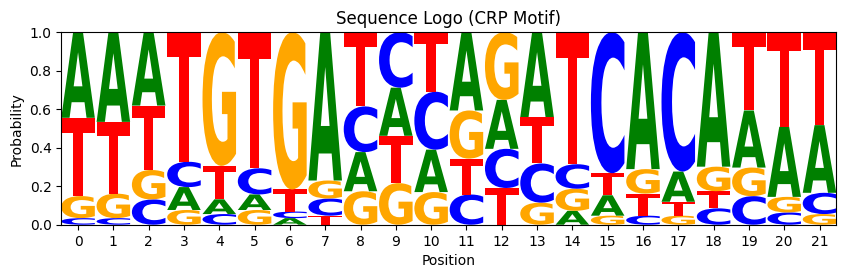

,A,T,G,C
0,0.444585,0.406514,0.114636,0.034264
1,0.465736,0.372673,0.127327,0.034264
2,0.381134,0.334602,0.152707,0.131557
3,0.118866,0.673012,0.076565,0.131557
4,0.076565,0.173858,0.694162,0.055415
5,0.080795,0.706853,0.076565,0.135787
6,0.034264,0.114636,0.816836,0.034264
7,0.770305,0.046954,0.093486,0.089255
8,0.203469,0.385364,0.173858,0.237310
9,0.250000,0.245770,0.216159,0.288071


In [ ]:
import logomaker
import matplotlib.pyplot as plt

logo=logomaker.Logo(
    ppm_df,
    shade_below=.5,
    fade_below=.5
)


logo.ax.set_xticks(range(len(ppm_df)))
logo.ax.set_xticklabels(range(len(ppm_df)))

logo.ax.set_xlabel("Position")
logo.ax.set_ylabel("Probability")
plt.title("Sequence Logo (CRP Motif)")
plt.show()


ppm_df

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# PPM: shape (4, 22)
bases=['A', 'T', 'G', 'C']
positions=list(range(1, 23))

fig=go.Figure()

for i, base in enumerate(bases):
    fig.add_bar(
        x=positions,
        y=PPM[i],
        name=base,
        hovertemplate=
        "Base: " + base +
        "<br>Position: %{x}" +
        "<br>Probability: %{y:.4f}"
    )

fig.update_layout(
    barmode='stack',
    title='Interactive PWM (Hover for Exact Probabilities)',
    xaxis_title='Position',
    yaxis_title='Probability',
    hovermode='x unified'
)

fig.show()
